In [731]:
import pandas as pd
import numpy as np

In [732]:
from numpy import linalg as LA
from scipy.spatial import distance

In [733]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [734]:
%matplotlib notebook
from matplotlib import pyplot as plt

In [735]:
from sklearn.decomposition import PCA

In [736]:
from numpy import linalg as LA

In [737]:
pca = PCA(n_components=2)

In [738]:
data_set = pd.read_csv("cho.txt", sep = '\t', lineterminator = '\n',header = -1)

In [739]:
data_set_1 = data_set[data_set[1]!=-1]

### Remove outliers

In [740]:
from scipy import stats
data_set_1 = data_set_1[(np.abs(stats.zscore(data_set_1)) < 3).all(axis=1)]

In [741]:
ground_truth = data_set_1[1]

In [780]:
len(ground_truth)

364

In [844]:
max_num_iterations = 50

In [845]:
num_clusters = len(ground_truth.unique())

In [846]:
num_clusters

5

In [847]:
data_set_1 = data_set_1.loc[:,2:]

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [2] of <class 'int'>

### Pre-processing data

In [848]:
scaler = MinMaxScaler()
print(scaler.fit(data_set_1))

data_set_1.head(3)

data_set_1 = pd.DataFrame(scaler.transform(data_set_1))

MinMaxScaler(copy=True, feature_range=(0, 1))


In [849]:
projected = pca.fit_transform(data_set_1)

In [850]:
pca.fit(data_set_1)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### Visualization of data points by PCA before clustering by K-means

In [851]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=ground_truth, edgecolor='none', alpha=1,
            cmap=plt.cm.get_cmap('nipy_spectral', 50))
plt.figure(1, figsize=(20, 5))
plt.axis([-2,2,-2,2])
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [852]:
projected = pca.fit_transform(data_set_1)

In [853]:
from scipy.spatial import distance

In [854]:
import numpy as np

In [855]:
data_set_1.shape[0]

364

In [856]:
data_set_1 = data_set_1.dropna()

In [857]:
data_set_1.shape[0]

364

### Sample, perform HAC and get intial centroids

In [858]:
sample_dataset = data_set_1.sample(frac=0.1, replace=False)

In [859]:
len(sample_dataset)

36

In [860]:
from sklearn.cluster import AgglomerativeClustering

In [861]:
cluster = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')  

In [862]:
arr = cluster.fit_predict(sample_dataset)

In [863]:
arr

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 3, 2, 1, 0, 0, 1, 3, 3, 0, 1, 0, 1, 2,
       1, 0, 1, 2, 0, 4, 0, 3, 0, 0, 2, 4, 3])

In [864]:
type(arr)

numpy.ndarray

In [865]:
sample_dataset['cluster_id'] = arr

In [866]:
global initial_centroids 
initial_centroids = sample_dataset.groupby("cluster_id").mean()

In [867]:
sample_dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,cluster_id
253,0.612426,0.630719,0.734091,0.650430,0.574074,0.430830,0.518868,0.354167,0.383929,0.471545,0.470000,0.384043,0.398876,0.173709,0.505085,0.534653,1.0,0
276,0.452663,0.663399,0.534091,0.627507,0.626543,0.577075,0.682390,0.565104,0.482143,0.341463,0.340000,0.515957,0.547191,0.605634,0.488136,0.366337,0.0,1
159,0.642012,0.434641,0.740909,0.779370,0.663580,0.553360,0.383648,0.351302,0.279762,0.571816,0.560000,0.452128,0.573034,0.037559,0.400000,0.501650,1.0,0
110,0.627219,0.702614,0.768182,0.713467,0.561728,0.521739,0.506289,0.427083,0.327381,0.558266,0.456667,0.404255,0.517978,0.516432,0.301695,0.227723,1.0,0
285,0.585799,0.813725,0.461364,0.575931,0.688272,0.715415,0.584906,0.515625,0.508929,0.292683,0.346667,0.388298,0.558989,0.553991,0.600000,0.363036,0.0,1


### Assign the centroids

In [868]:
display(initial_centroids)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
cluster_id,,,,,,,,,,,,,,,,,
0,0.587463,0.612132,0.683239,0.698066,0.591821,0.489377,0.504717,0.420557,0.427455,0.465617,0.504375,0.481782,0.436517,0.364319,0.441081,0.389439,1.00
1,0.386095,0.527778,0.531250,0.660817,0.759645,0.650198,0.604560,0.467448,0.414062,0.371951,0.472500,0.599668,0.681882,0.574941,0.573390,0.419142,0.00
2,0.223077,0.268627,0.302727,0.297421,0.398148,0.608696,0.837107,0.712500,0.836905,0.431978,0.366000,0.407447,0.669663,0.704789,0.820068,0.653465,0.75
3,0.544970,0.594118,0.797273,0.711748,0.464815,0.339921,0.344025,0.259375,0.429762,0.564228,0.702000,0.732979,0.570787,0.392113,0.318644,0.446865,0.45
4,0.755917,0.553922,0.329545,0.369628,0.447531,0.341897,0.407233,0.425781,0.571429,0.533875,0.535000,0.505319,0.480337,0.613380,0.698305,0.684818,0.25


In [869]:
def get_cluster(data_point,initial_centroids):
    train_1 = initial_centroids.iloc(axis = 0)[:,-1]
    data_point = data_point.drop('cluster_id',axis=1)
    min_dst = -1
    cluster_id = 0
    for i,val in initial_centroids.iterrows():
        train_data_point = pd.DataFrame(val).transpose()
        train_data_point_1 = train_data_point.copy()
        dst = distance.euclidean(data_point, train_data_point_1)
        if((min_dst > dst) or min_dst < 0):
            min_dst = dst
            cluster_id = i
    return cluster_id + 1

In [870]:
def K_means(data_set_1):
    initial_centroids = sample_dataset.groupby("cluster_id").mean()
    iteration = 0
    while(True):
        iteration = iteration + 1
        for i,data_point in data_set_1.iterrows():
            data_point = pd.DataFrame(data_point).transpose()
            predicted_cluster = get_cluster(data_point,initial_centroids)
            try:
                data_set_1.iloc[i]['cluster_id'] = predicted_cluster
            except:
                i = i+1
                continue
        data_set_2 = data_set_1
        present_centroids = data_set_2.groupby("cluster_id").mean()
        try:
            print(initial_centroids)
            print(present_centroids)
            print("----------------")
            print("----------------")
            if(initial_centroids.equals(present_centroids) or iteration > max_num_iterations):
                break
            initial_centroids = present_centroids
        except:
            continue

In [871]:
default_cluster = np.zeros(shape=(data_set_1.shape[0]), dtype=float, order='F')

In [872]:
data_set_1['cluster_id'] = default_cluster

In [873]:
data_set_1.shape[1]

18

In [874]:
data_set_1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,cluster_id
0,0.390533,0.330065,0.272727,0.349570,0.342593,0.517787,0.235849,0.166667,0.782738,0.794038,0.653333,0.797872,0.595506,0.502347,0.633898,0.772277,0.25,0.0
1,0.505917,0.460784,0.470455,0.395415,0.429012,0.355731,0.396226,0.213542,0.633929,0.658537,0.566667,0.526596,0.625843,0.464789,0.515254,0.722772,0.25,0.0
2,0.615385,0.728758,0.429545,0.343840,0.317901,0.316206,0.594340,0.690104,0.711310,0.498645,0.370000,0.281915,0.475843,0.427230,0.549153,0.620462,0.25,0.0
3,0.286982,0.686275,0.652273,0.412607,0.240741,0.343874,0.638365,0.731771,0.857143,0.517615,0.420000,0.367021,0.095506,0.460094,0.600678,0.501650,0.75,0.0
4,0.248521,0.673203,0.418182,0.240688,0.154321,0.142292,0.625786,0.726563,0.803571,0.555556,0.336667,0.191489,0.412921,0.615023,0.877966,0.726073,0.75,0.0


In [875]:
K_means(data_set_1)

                  0         1         2         3         4         5   \
cluster_id                                                               
0           0.587463  0.612132  0.683239  0.698066  0.591821  0.489377   
1           0.386095  0.527778  0.531250  0.660817  0.759645  0.650198   
2           0.223077  0.268627  0.302727  0.297421  0.398148  0.608696   
3           0.544970  0.594118  0.797273  0.711748  0.464815  0.339921   
4           0.755917  0.553922  0.329545  0.369628  0.447531  0.341897   

                  6         7         8         9         10        11  \
cluster_id                                                               
0           0.504717  0.420557  0.427455  0.465617  0.504375  0.481782   
1           0.604560  0.467448  0.414062  0.371951  0.472500  0.599668   
2           0.837107  0.712500  0.836905  0.431978  0.366000  0.407447   
3           0.344025  0.259375  0.429762  0.564228  0.702000  0.732979   
4           0.407233  0.425781  0.571

----------------
----------------
                  0         1         2         3         4         5   \
cluster_id                                                               
3.0         0.532441  0.628910  0.692875  0.666809  0.547631  0.420792   
4.0         0.419242  0.482692  0.500393  0.629417  0.710296  0.688430   
5.0         0.359333  0.412282  0.335372  0.353998  0.425028  0.532519   
6.0         0.446162  0.693764  0.841288  0.735355  0.485082  0.366711   
7.0         0.602828  0.573716  0.393734  0.342693  0.345282  0.322530   

                  6         7         8         9         10        11  \
cluster_id                                                               
3.0         0.486061  0.384354  0.433963  0.510298  0.536101  0.508344   
4.0         0.661581  0.491898  0.477881  0.323932  0.404901  0.566063   
5.0         0.787936  0.716051  0.769643  0.392560  0.302970  0.345455   
6.0         0.368056  0.220265  0.316840  0.671033  0.683111  0.631981   
7.0

                  0         1         2         3         4         5   \
cluster_id                                                               
6.0         0.532441  0.628910  0.692875  0.666809  0.547631  0.420792   
7.0         0.419242  0.482692  0.500393  0.629417  0.710296  0.688430   
8.0         0.359333  0.412282  0.335372  0.353998  0.425028  0.532519   
9.0         0.446162  0.693764  0.841288  0.735355  0.485082  0.366711   
10.0        0.602828  0.573716  0.393734  0.342693  0.345282  0.322530   

                  6         7         8         9         10        11  \
cluster_id                                                               
6.0         0.486061  0.384354  0.433963  0.510298  0.536101  0.508344   
7.0         0.661581  0.491898  0.477881  0.323932  0.404901  0.566063   
8.0         0.787936  0.716051  0.769643  0.392560  0.302970  0.345455   
9.0         0.368056  0.220265  0.316840  0.671033  0.683111  0.631981   
10.0        0.453774  0.418564  0.608

                  0         1         2         3         4         5   \
cluster_id                                                               
9.0         0.532441  0.628910  0.692875  0.666809  0.547631  0.420792   
10.0        0.419242  0.482692  0.500393  0.629417  0.710296  0.688430   
11.0        0.359333  0.412282  0.335372  0.353998  0.425028  0.532519   
12.0        0.446162  0.693764  0.841288  0.735355  0.485082  0.366711   
13.0        0.602828  0.573716  0.393734  0.342693  0.345282  0.322530   

                  6         7         8         9         10        11  \
cluster_id                                                               
9.0         0.486061  0.384354  0.433963  0.510298  0.536101  0.508344   
10.0        0.661581  0.491898  0.477881  0.323932  0.404901  0.566063   
11.0        0.787936  0.716051  0.769643  0.392560  0.302970  0.345455   
12.0        0.368056  0.220265  0.316840  0.671033  0.683111  0.631981   
13.0        0.453774  0.418564  0.608

                  0         1         2         3         4         5   \
cluster_id                                                               
12.0        0.532441  0.628910  0.692875  0.666809  0.547631  0.420792   
13.0        0.419242  0.482692  0.500393  0.629417  0.710296  0.688430   
14.0        0.359333  0.412282  0.335372  0.353998  0.425028  0.532519   
15.0        0.446162  0.693764  0.841288  0.735355  0.485082  0.366711   
16.0        0.602828  0.573716  0.393734  0.342693  0.345282  0.322530   

                  6         7         8         9         10        11  \
cluster_id                                                               
12.0        0.486061  0.384354  0.433963  0.510298  0.536101  0.508344   
13.0        0.661581  0.491898  0.477881  0.323932  0.404901  0.566063   
14.0        0.787936  0.716051  0.769643  0.392560  0.302970  0.345455   
15.0        0.368056  0.220265  0.316840  0.671033  0.683111  0.631981   
16.0        0.453774  0.418564  0.608

                  0         1         2         3         4         5   \
cluster_id                                                               
15.0        0.532441  0.628910  0.692875  0.666809  0.547631  0.420792   
16.0        0.419242  0.482692  0.500393  0.629417  0.710296  0.688430   
17.0        0.359333  0.412282  0.335372  0.353998  0.425028  0.532519   
18.0        0.446162  0.693764  0.841288  0.735355  0.485082  0.366711   
19.0        0.602828  0.573716  0.393734  0.342693  0.345282  0.322530   

                  6         7         8         9         10        11  \
cluster_id                                                               
15.0        0.486061  0.384354  0.433963  0.510298  0.536101  0.508344   
16.0        0.661581  0.491898  0.477881  0.323932  0.404901  0.566063   
17.0        0.787936  0.716051  0.769643  0.392560  0.302970  0.345455   
18.0        0.368056  0.220265  0.316840  0.671033  0.683111  0.631981   
19.0        0.453774  0.418564  0.608

----------------
----------------
                  0         1         2         3         4         5   \
cluster_id                                                               
18.0        0.532441  0.628910  0.692875  0.666809  0.547631  0.420792   
19.0        0.419242  0.482692  0.500393  0.629417  0.710296  0.688430   
20.0        0.359333  0.412282  0.335372  0.353998  0.425028  0.532519   
21.0        0.446162  0.693764  0.841288  0.735355  0.485082  0.366711   
22.0        0.602828  0.573716  0.393734  0.342693  0.345282  0.322530   

                  6         7         8         9         10        11  \
cluster_id                                                               
18.0        0.486061  0.384354  0.433963  0.510298  0.536101  0.508344   
19.0        0.661581  0.491898  0.477881  0.323932  0.404901  0.566063   
20.0        0.787936  0.716051  0.769643  0.392560  0.302970  0.345455   
21.0        0.368056  0.220265  0.316840  0.671033  0.683111  0.631981   
22.

----------------
                  0         1         2         3         4         5   \
cluster_id                                                               
21.0        0.532441  0.628910  0.692875  0.666809  0.547631  0.420792   
22.0        0.419242  0.482692  0.500393  0.629417  0.710296  0.688430   
23.0        0.359333  0.412282  0.335372  0.353998  0.425028  0.532519   
24.0        0.446162  0.693764  0.841288  0.735355  0.485082  0.366711   
25.0        0.602828  0.573716  0.393734  0.342693  0.345282  0.322530   

                  6         7         8         9         10        11  \
cluster_id                                                               
21.0        0.486061  0.384354  0.433963  0.510298  0.536101  0.508344   
22.0        0.661581  0.491898  0.477881  0.323932  0.404901  0.566063   
23.0        0.787936  0.716051  0.769643  0.392560  0.302970  0.345455   
24.0        0.368056  0.220265  0.316840  0.671033  0.683111  0.631981   
25.0        0.453774

                  0         1         2         3         4         5   \
cluster_id                                                               
25.0        0.532441  0.628910  0.692875  0.666809  0.547631  0.420792   
26.0        0.419242  0.482692  0.500393  0.629417  0.710296  0.688430   
27.0        0.359333  0.412282  0.335372  0.353998  0.425028  0.532519   
28.0        0.446162  0.693764  0.841288  0.735355  0.485082  0.366711   
29.0        0.602828  0.573716  0.393734  0.342693  0.345282  0.322530   

                  6         7         8         9         10        11  \
cluster_id                                                               
25.0        0.486061  0.384354  0.433963  0.510298  0.536101  0.508344   
26.0        0.661581  0.491898  0.477881  0.323932  0.404901  0.566063   
27.0        0.787936  0.716051  0.769643  0.392560  0.302970  0.345455   
28.0        0.368056  0.220265  0.316840  0.671033  0.683111  0.631981   
29.0        0.453774  0.418564  0.608

----------------
                  0         1         2         3         4         5   \
cluster_id                                                               
28.0        0.532441  0.628910  0.692875  0.666809  0.547631  0.420792   
29.0        0.419242  0.482692  0.500393  0.629417  0.710296  0.688430   
30.0        0.359333  0.412282  0.335372  0.353998  0.425028  0.532519   
31.0        0.446162  0.693764  0.841288  0.735355  0.485082  0.366711   
32.0        0.602828  0.573716  0.393734  0.342693  0.345282  0.322530   

                  6         7         8         9         10        11  \
cluster_id                                                               
28.0        0.486061  0.384354  0.433963  0.510298  0.536101  0.508344   
29.0        0.661581  0.491898  0.477881  0.323932  0.404901  0.566063   
30.0        0.787936  0.716051  0.769643  0.392560  0.302970  0.345455   
31.0        0.368056  0.220265  0.316840  0.671033  0.683111  0.631981   
32.0        0.453774

                  0         1         2         3         4         5   \
cluster_id                                                               
31.0        0.532441  0.628910  0.692875  0.666809  0.547631  0.420792   
32.0        0.419242  0.482692  0.500393  0.629417  0.710296  0.688430   
33.0        0.359333  0.412282  0.335372  0.353998  0.425028  0.532519   
34.0        0.446162  0.693764  0.841288  0.735355  0.485082  0.366711   
35.0        0.602828  0.573716  0.393734  0.342693  0.345282  0.322530   

                  6         7         8         9         10        11  \
cluster_id                                                               
31.0        0.486061  0.384354  0.433963  0.510298  0.536101  0.508344   
32.0        0.661581  0.491898  0.477881  0.323932  0.404901  0.566063   
33.0        0.787936  0.716051  0.769643  0.392560  0.302970  0.345455   
34.0        0.368056  0.220265  0.316840  0.671033  0.683111  0.631981   
35.0        0.453774  0.418564  0.608

38.0        0.572544  0.565835  0.620843  0.641301  0.25  
----------------
----------------
                  0         1         2         3         4         5   \
cluster_id                                                               
34.0        0.532441  0.628910  0.692875  0.666809  0.547631  0.420792   
35.0        0.419242  0.482692  0.500393  0.629417  0.710296  0.688430   
36.0        0.359333  0.412282  0.335372  0.353998  0.425028  0.532519   
37.0        0.446162  0.693764  0.841288  0.735355  0.485082  0.366711   
38.0        0.602828  0.573716  0.393734  0.342693  0.345282  0.322530   

                  6         7         8         9         10        11  \
cluster_id                                                               
34.0        0.486061  0.384354  0.433963  0.510298  0.536101  0.508344   
35.0        0.661581  0.491898  0.477881  0.323932  0.404901  0.566063   
36.0        0.787936  0.716051  0.769643  0.392560  0.302970  0.345455   
37.0        0.3680

----------------
----------------
                  0         1         2         3         4         5   \
cluster_id                                                               
37.0        0.532441  0.628910  0.692875  0.666809  0.547631  0.420792   
38.0        0.419242  0.482692  0.500393  0.629417  0.710296  0.688430   
39.0        0.359333  0.412282  0.335372  0.353998  0.425028  0.532519   
40.0        0.446162  0.693764  0.841288  0.735355  0.485082  0.366711   
41.0        0.602828  0.573716  0.393734  0.342693  0.345282  0.322530   

                  6         7         8         9         10        11  \
cluster_id                                                               
37.0        0.486061  0.384354  0.433963  0.510298  0.536101  0.508344   
38.0        0.661581  0.491898  0.477881  0.323932  0.404901  0.566063   
39.0        0.787936  0.716051  0.769643  0.392560  0.302970  0.345455   
40.0        0.368056  0.220265  0.316840  0.671033  0.683111  0.631981   
41.

----------------
                  0         1         2         3         4         5   \
cluster_id                                                               
40.0        0.532441  0.628910  0.692875  0.666809  0.547631  0.420792   
41.0        0.419242  0.482692  0.500393  0.629417  0.710296  0.688430   
42.0        0.359333  0.412282  0.335372  0.353998  0.425028  0.532519   
43.0        0.446162  0.693764  0.841288  0.735355  0.485082  0.366711   
44.0        0.602828  0.573716  0.393734  0.342693  0.345282  0.322530   

                  6         7         8         9         10        11  \
cluster_id                                                               
40.0        0.486061  0.384354  0.433963  0.510298  0.536101  0.508344   
41.0        0.661581  0.491898  0.477881  0.323932  0.404901  0.566063   
42.0        0.787936  0.716051  0.769643  0.392560  0.302970  0.345455   
43.0        0.368056  0.220265  0.316840  0.671033  0.683111  0.631981   
44.0        0.453774

----------------
----------------
                  0         1         2         3         4         5   \
cluster_id                                                               
43.0        0.532441  0.628910  0.692875  0.666809  0.547631  0.420792   
44.0        0.419242  0.482692  0.500393  0.629417  0.710296  0.688430   
45.0        0.359333  0.412282  0.335372  0.353998  0.425028  0.532519   
46.0        0.446162  0.693764  0.841288  0.735355  0.485082  0.366711   
47.0        0.602828  0.573716  0.393734  0.342693  0.345282  0.322530   

                  6         7         8         9         10        11  \
cluster_id                                                               
43.0        0.486061  0.384354  0.433963  0.510298  0.536101  0.508344   
44.0        0.661581  0.491898  0.477881  0.323932  0.404901  0.566063   
45.0        0.787936  0.716051  0.769643  0.392560  0.302970  0.345455   
46.0        0.368056  0.220265  0.316840  0.671033  0.683111  0.631981   
47.

----------------
----------------
                  0         1         2         3         4         5   \
cluster_id                                                               
46.0        0.532441  0.628910  0.692875  0.666809  0.547631  0.420792   
47.0        0.419242  0.482692  0.500393  0.629417  0.710296  0.688430   
48.0        0.359333  0.412282  0.335372  0.353998  0.425028  0.532519   
49.0        0.446162  0.693764  0.841288  0.735355  0.485082  0.366711   
50.0        0.602828  0.573716  0.393734  0.342693  0.345282  0.322530   

                  6         7         8         9         10        11  \
cluster_id                                                               
46.0        0.486061  0.384354  0.433963  0.510298  0.536101  0.508344   
47.0        0.661581  0.491898  0.477881  0.323932  0.404901  0.566063   
48.0        0.787936  0.716051  0.769643  0.392560  0.302970  0.345455   
49.0        0.368056  0.220265  0.316840  0.671033  0.683111  0.631981   
50.

----------------
----------------
                  0         1         2         3         4         5   \
cluster_id                                                               
49.0        0.532441  0.628910  0.692875  0.666809  0.547631  0.420792   
50.0        0.419242  0.482692  0.500393  0.629417  0.710296  0.688430   
51.0        0.359333  0.412282  0.335372  0.353998  0.425028  0.532519   
52.0        0.446162  0.693764  0.841288  0.735355  0.485082  0.366711   
53.0        0.602828  0.573716  0.393734  0.342693  0.345282  0.322530   

                  6         7         8         9         10        11  \
cluster_id                                                               
49.0        0.486061  0.384354  0.433963  0.510298  0.536101  0.508344   
50.0        0.661581  0.491898  0.477881  0.323932  0.404901  0.566063   
51.0        0.787936  0.716051  0.769643  0.392560  0.302970  0.345455   
52.0        0.368056  0.220265  0.316840  0.671033  0.683111  0.631981   
53.

In [886]:
 calc_truth = data_set_1["cluster_id"]

In [887]:
%matplotlib notebook
from matplotlib import pyplot

In [888]:
calc_truth.unique()

array([ 5.,  3.,  1.,  4.,  2.])

<IPython.core.display.Javascript object>


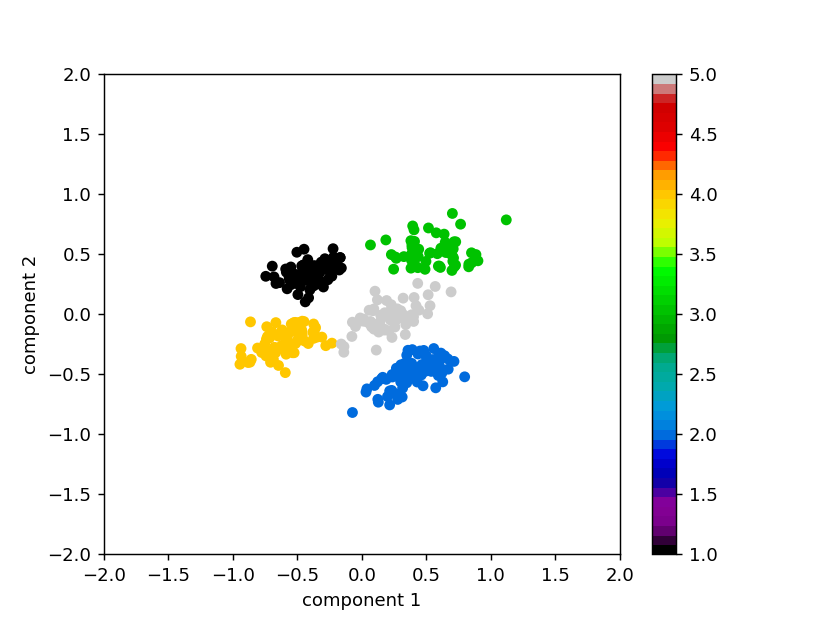

In [889]:
pyplot.scatter(projected[:, 0], projected[:, 1],
            c=calc_truth, edgecolor='none', alpha=1,
            cmap=plt.cm.get_cmap('nipy_spectral', 50))
pyplot.figure(1, figsize=(20, 10))
pyplot.axis([-2,2,-2,2])
pyplot.xlabel('component 1')
pyplot.ylabel('component 2')
pyplot.colorbar();

In [880]:
len(calc_truth)

364

In [890]:
def incidence_matrix(ground_truth,default_clusters,ground_truth_map):
    incidence_matrix = np.zeros((len(default_clusters),len(default_clusters)))
    incidence_matrix_p = np.zeros((len(default_clusters),len(default_clusters)))
    incidence_matrix_c = np.zeros((len(default_clusters),len(default_clusters)))
    for i in range(len(default_clusters)):
        for j in range(len(default_clusters)):
            if default_clusters[i] == default_clusters[j]:
                incidence_matrix_c[i][j] = 1
            else:
                incidence_matrix_c[i][j] = 0
            if ground_truth[ground_truth_map[i]] == ground_truth[ground_truth_map[j]]:
                incidence_matrix_p[i][j] = 1
            else:
                incidence_matrix_p[i][j] = 0
    return incidence_matrix_c,incidence_matrix_p

In [891]:
def jaccard_coefficient(ground_truth,default_clusters,ground_truth_map):
    index = 0
    M11 = 0
    M00 = 0
    M10 = 0
    M01 = 0
    incidence_matrix_c,incidence_matrix_p = incidence_matrix(ground_truth,default_clusters,ground_truth_map)
    for i in range(len(default_clusters)):
        for j in range(len(default_clusters)):
            if incidence_matrix_p[i][j] == 1 and incidence_matrix_c[i][j] == 1:
                M11 = M11 + 1
            elif incidence_matrix_p[i][j] == 0 and incidence_matrix_c[i][j] == 0:
                M00 = M00 + 1
            elif incidence_matrix_p[i][j] == 1 and incidence_matrix_c[i][j] == 0:
                M10 = M10 + 1
            elif incidence_matrix_p[i][j] == 0 and incidence_matrix_c[i][j] == 1:
                M01 = M01 + 1
            index = index + 1
#    print (M11,M10,M01)
    jaccard_coeff = M11 / (M11 + M10 + M01)
    return jaccard_coeff

In [892]:
def calc_jaccard(default_clusters):
    default_clusters_set = sorted(set(default_clusters))
   # print (len(default_clusters_set))
    clusters_map = {}
    for i in range(len(default_clusters_set)):
        clusters_map[default_clusters_set[i]] = i+1
    count = 1
    cluster_id = 1
    for i in range(len(default_clusters)):
        default_clusters[i] = clusters_map[default_clusters[i]]
    ground_truth_map = {}
    index = 0
    for i in ground_truth.index.values:
        ground_truth_map[index] = i
        index = index + 1
    return jaccard_coefficient(ground_truth,default_clusters,ground_truth_map)

In [893]:
jaccard_coefficient = calc_jaccard(calc_truth)
print ("jaccard_coefficient")
print (jaccard_coefficient)

jaccard_coefficient
0.3350414054993823
